## Unibot Chatbot Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
nltk.download("words")


[nltk_data] Downloading package words to
[nltk_data]     /Users/kausiklakkaraju/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [2]:
data = pd.read_csv('../../data/real-world/unibot/final/final.csv')

In [3]:
data.head()

,C_num,UB,User_gender,Text
0,1,1,0,"Hey, Hi"
1,1,0,0,Hey! Welcome to the website of University of S...
2,1,1,0,"Hey, student living"
3,1,0,0,Please refer to the FAQ here for answer - http...
4,1,0,0,Was this helpful?


In [5]:
# Each turn is a series of user-chatbot utterances.
data_groups = data.groupby('C_num')

# Calculate the difference between consecutive rows. If it is 1, calculate the number of times this difference is 1.
num_turns = data_groups['UB'].apply(lambda x: (x.diff() == 1).sum())
avg_turns = data_groups['UB'].apply(lambda x: (x.diff() == 1).sum()).mean()

print("C_num denotes conversation number.")
print(num_turns)

print("The average number of turns are: ")
print(round(avg_turns,2))

C_num denotes conversation number.
C_num
1     18
2     22
3     18
4     22
5     18
6     16
7     17
8     29
9     22
10    18
11    16
12     9
13    17
14     6
15     9
16    31
17    11
18     6
19    24
20    27
21    21
22     3
23    24
24    21
25    50
26    31
27    16
28    24
29    23
30    18
31    28
Name: UB, dtype: int64
The average number of turns are: 
19.84


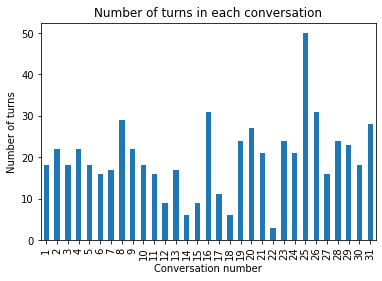

In [6]:
# Draw a graph
num_turns.plot(kind='bar')
plt.xlabel('Conversation number')
plt.ylabel('Number of turns')
plt.title('Number of turns in each conversation')
plt.show()

In [7]:
data_groups = data.groupby('C_num')
bot_utterances = data_groups['UB'].apply(lambda x: (x == 0).sum())
bot_utterances_avg = data_groups['UB'].apply(lambda x: (x == 0).sum()).mean()
user_utterances = data_groups['UB'].apply(lambda x: (x == 1).sum())
user_utterances_avg = data_groups['UB'].apply(lambda x: (x == 1).sum()).mean()


print("C_num denotes conversation number.")
print("Number of bot utterances in each conversation: ")
print(bot_utterances)
print("Average number of bot utterances are: ")
print(round(bot_utterances_avg,2))


C_num denotes conversation number.
Number of bot utterances in each conversation: 
C_num
1     23
2     29
3     23
4     29
5     24
6     19
7     20
8     36
9     29
10    24
11    20
12    13
13    21
14     8
15    12
16    41
17    15
18     7
19    30
20    35
21    27
22     4
23    30
24    27
25    66
26    39
27    21
28    32
29    32
30    22
31    39
Name: UB, dtype: int64
Average number of bot utterances are: 
25.71


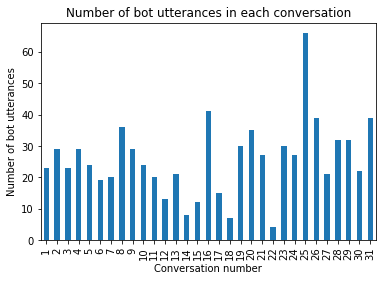

In [8]:
bot_utterances.plot(kind='bar')
plt.xlabel('Conversation number')
plt.ylabel('Number of bot utterances')
plt.title('Number of bot utterances in each conversation')
plt.show()

In [9]:
print("Number of user utterances in each conversation: ")
print(user_utterances)
print("Average number of user utterances are: ")
print(round(user_utterances_avg,2))

Number of user utterances in each conversation: 
C_num
1     19
2     23
3     19
4     23
5     19
6     20
7     23
8     32
9     23
10    19
11    18
12    10
13    18
14     7
15    12
16    32
17    12
18     7
19    25
20    28
21    21
22     4
23    25
24    21
25    51
26    34
27    20
28    25
29    26
30    21
31    30
Name: UB, dtype: int64
Average number of user utterances are: 
21.52


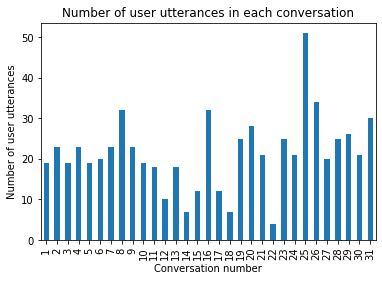

In [10]:
user_utterances.plot(kind='bar')
plt.xlabel('Conversation number')
plt.ylabel('Number of user utterances')
plt.title('Number of user utterances in each conversation')
plt.show()

In [11]:
data0 = data[data['UB'] == 0]
data1 = data[data['UB'] == 1]

In [12]:
stop_words = set(stopwords.words('english'))

def count_stop_words(text):
    tokens = nltk.word_tokenize(str(text).lower())
    sw_count = sum([1 for token in tokens if token in stop_words])

    return sw_count

In [13]:
print("Average number of stopwords used by the chatbot: ")
print(data0['Text'].apply(count_stop_words).mean())
print("Average number of stopwords used by the user: ")
print(data1['Text'].apply(count_stop_words).mean())

Average number of stopwords used by the chatbot: 
3.9786700125470515
Average number of stopwords used by the user: 
2.0914542728635683


In [14]:
def count_words(text):
    return len(str(text).split())

In [15]:
print("Average number of words in each utterance of the chatbot: ")
print(data0['Text'].apply(count_words).mean())
print("Average number of words in each utterance of the user: ")
print(data1['Text'].apply(count_words).mean())

Average number of words in each utterance of the chatbot: 
8.616060225846926
Average number of words in each utterance of the user: 
6.760119940029985


In [18]:
## Number of average utterances
data_groups = data.groupby('C_num')
male_utterances = data_groups['User_gender'].apply(lambda x: (x == 1).sum())
male_utterances_avg = data_groups['User_gender'].apply(lambda x: (x == 1).sum()).sum() / 10
female_utterances = data_groups['User_gender'].apply(lambda x: (x == 2).sum())
female_utterances_avg = data_groups['User_gender'].apply(lambda x: (x == 2).sum()).sum() / 10
na_utterances = data_groups['User_gender'].apply(lambda x: (x == 0).sum())
na_utterances_avg = data_groups['User_gender'].apply(lambda x: (x == 0).sum()).sum() / 11

print("C_num denotes conversation number.")

print("Number of male utterances in each conversation: ")
print(male_utterances)
print("Average number of male utterances are: ")
print(round(male_utterances_avg,2))

C_num denotes conversation number.
Number of male utterances in each conversation: 
C_num
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12    23
13    39
14    15
15    24
16    73
17    27
18    14
19    55
20    63
21    48
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
Name: User_gender, dtype: int64
Average number of male utterances are: 
38.1


In [19]:
print("Number of female utterances in each conversation: ")
print(female_utterances)
print("Average number of female utterances are: ")
print(round(female_utterances_avg,2))

Number of female utterances in each conversation: 
C_num
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      8
23     55
24     48
25    117
26     73
27     41
28     57
29     58
30     43
31     69
Name: User_gender, dtype: int64
Average number of female utterances are: 
56.9


In [20]:
print("Number of NA utterances in each conversation: ")
print(na_utterances)
print("Average number of NA utterances are: ")
print(round(na_utterances_avg,2))

Number of NA utterances in each conversation: 
C_num
1     42
2     52
3     42
4     52
5     43
6     39
7     43
8     68
9     52
10    43
11    38
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
Name: User_gender, dtype: int64
Average number of NA utterances are: 
46.73


In [21]:
data0 = data[data['User_gender'] == 0]
data1 = data[data['User_gender'] == 1]
data2 = data[data['User_gender'] == 2]

In [22]:
stop_words = set(stopwords.words('english'))

def count_stop_words(text):
    tokens = nltk.word_tokenize(str(text).lower())
    sw_count = sum([1 for token in tokens if token in stop_words])

    return sw_count

In [23]:
print("Average number of stopwords used by NA users: ")
print(data0['Text'].apply(count_stop_words).mean())
print("Average number of stopwords used by male users: ")
print(data1['Text'].apply(count_stop_words).mean())
print("Average number of stopwords used by female users: ")
print(data2['Text'].apply(count_stop_words).mean())

Average number of stopwords used by NA users: 
2.8190661478599224
Average number of stopwords used by male users: 
3.1942257217847767
Average number of stopwords used by female users: 
3.3391915641476273


In [24]:
def count_words(text):
    return len(str(text).split())

In [25]:
print("Average number of words used by NA users: ")
print(data0['Text'].apply(count_words).mean())
print("Average number of words used by male users: ")
print(data1['Text'].apply(count_words).mean())
print("Average number of words used by female users: ")
print(data2['Text'].apply(count_words).mean())

Average number of words used by NA users: 
6.599221789883268
Average number of words used by male users: 
8.141732283464567
Average number of words used by female users: 
8.579964850615115
